In [31]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [33]:
X_train.shape

(50000, 32, 32, 3)

In [34]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [35]:
y_train[:5] #on a y_train 2d on doit le changer vers 1d avec reshape

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [36]:
y_train = y_train.reshape(-1)
y_train[:5]
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [37]:
#scaling X_train et X_test
X_train = X_train / 255
X_test = X_test/ 255

In [38]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [78]:
CNN = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"), #convolution avec les filters
    keras.layers.MaxPooling2D((2,2)), #réduction de dimention 
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"), #convolution avec les filters
    keras.layers.MaxPooling2D((2,2)), #réduction de dimention 

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [64]:
CNN.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [65]:
CNN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.3710 - loss: 1.6991
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6030 - loss: 1.1199
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6647 - loss: 0.9523
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7047 - loss: 0.8445
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7382 - loss: 0.7544
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7604 - loss: 0.6868
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7836 - loss: 0.6186
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8034 - loss: 0.5587
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8224 - loss: 0.4984
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.8426 - loss: 0.4496


In [66]:
CNN.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6965 - loss: 1.0059


[1.009285807609558, 0.6966000199317932]

In [74]:
y_pred = CNN.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


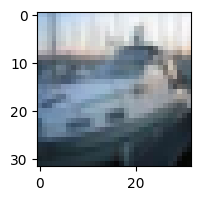

In [68]:
plt.figure(figsize = (15,2))
plt.imshow(X_test[2]) #Ship

In [75]:
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:10]

[np.int64(3),
 np.int64(8),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(6),
 np.int64(1),
 np.int64(6),
 np.int64(3),
 np.int64(1)]

In [76]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1000
           1       0.85      0.80      0.83      1000
           2       0.59      0.55      0.57      1000
           3       0.55      0.45      0.50      1000
           4       0.64      0.65      0.64      1000
           5       0.58      0.62      0.60      1000
           6       0.76      0.75      0.76      1000
           7       0.70      0.79      0.74      1000
           8       0.75      0.83      0.79      1000
           9       0.81      0.79      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

